In [129]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Загрузка данных

In [130]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [131]:
data = pd.read_excel('data\data_ford_price.xlsx') 

In [132]:
data

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


In [133]:
y = data['price']
X = data.drop(columns='price')

# Предобработка

In [134]:
lr = LinearRegression()
lr.fit(X,y)

ValueError: could not convert string to float: 'clean'

_______________________
Сторонний пример

In [ ]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
lb.fit(education)
 
print('категории:', lb.classes_) 
lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

<AxesSubplot:>

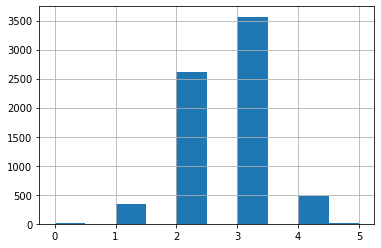

In [ ]:
data['condition'].hist()

<AxesSubplot:>

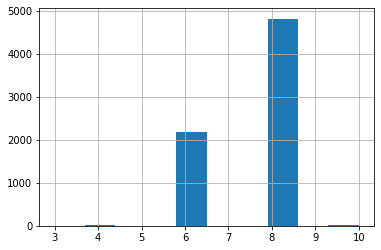

In [ ]:
data['cylinders'].hist()

In [ ]:
data['cylinders'].value_counts()

8     4816
6     2173
10      11
4       11
5        5
3        1
Name: cylinders, dtype: int64

___________________________________

In [ ]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
 print('Число уникальных значений признака {}: '.format(column), data[column].nunique())

Число уникальных значений признака cylinders:  6
Число уникальных значений признака title_status:  5
Число уникальных значений признака transmission:  3
Число уникальных значений признака drive:  3
Число уникальных значений признака size:  4


In [ ]:
data.shape

(7017, 12)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray() 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names.shape)

(23,)


Задание 3.7
1 point possible (graded)
Какая форма (количество строк и столбцов) будет у нашего датасета о стоимости автомобилей после кодировки номинальных признаков однократным методом?

In [ ]:
data_onehot = pd.DataFrame(data=data_onehot, index=data.index, columns=column_names)
data_onehot

,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_10,title_status_clean,title_status_lien,title_status_missing,title_status_rebuilt,...,transmission_other,drive_4wd,drive_fwd,drive_rwd,drive_nan,size_compact,size_full-size,size_mid-size,size_sub-compact,size_nan
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7013,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7014,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7015,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
data_new = pd.concat([data, data_onehot], axis = 1)

In [ ]:
data_new

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,...,transmission_other,drive_4wd,drive_fwd,drive_rwd,drive_nan,size_compact,size_full-size,size_mid-size,size_sub-compact,size_nan
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
data_new.shape

(7017, 35)

In [ ]:
data_new = data_new.drop(columns=columns_to_change)

In [ ]:
data_new

,price,year,condition,odometer,lat,long,weather,cylinders_3,cylinders_4,cylinders_5,...,transmission_other,drive_4wd,drive_fwd,drive_rwd,drive_nan,size_compact,size_full-size,size_mid-size,size_sub-compact,size_nan
0,43900,2016,4,43500,36.471500,-82.483400,59.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,15490,2009,2,98131,40.468826,-74.281734,52.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2495,2002,2,201803,42.477134,-82.949564,45.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1300,2000,1,170305,40.764373,-82.349503,49.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13865,2010,3,166062,49.210949,-123.114720,NaN,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,23500,32.680700,-117.169800,59.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7013,5975,2005,2,0,38.213303,-85.785762,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7014,9999,2006,3,161514,37.609783,-120.995406,59.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7015,10900,2011,2,164000,43.140600,-93.385000,47.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
data_new.shape

(7017, 30)